In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 26_01_2022 07_33_07.xlsx')

In [5]:
filtrado = dados[['Sem Epi Evolucao','Classificacao final','Evolucao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado = filtrado.loc[filtrado['Evolucao']=='Óbito']
filtrado = filtrado.groupby('Sem Epi Evolucao').count()
filtrado = filtrado.reset_index()
filtrado

,Sem Epi Evolucao,Classificacao final,Evolucao
0,2020_13,3,3
1,2020_14,4,4
2,2020_15,10,10
3,2020_16,8,8
4,2020_17,12,12
...,...,...,...
95,2022_03,158,158
96,2022_04,271,271
97,2022_05,342,342
98,2022_06,345,345


In [6]:
semana = filtrado.set_index('Sem Epi Evolucao')
semana = semana.drop(['2022_07'])
semana = semana.reset_index()
semana = semana['Sem Epi Evolucao']
semana

0     2020_13
1     2020_14
2     2020_15
3     2020_16
4     2020_17
       ...   
94    2022_02
95    2022_03
96    2022_04
97    2022_05
98    2022_06
Name: Sem Epi Evolucao, Length: 99, dtype: object

In [7]:
obito = filtrado.set_index('Sem Epi Evolucao')
obito = obito.drop(['2022_07'])
obito = obito['Evolucao']
obito

Sem Epi Evolucao
2020_13      3
2020_14      4
2020_15     10
2020_16      8
2020_17     12
          ... 
2022_02     62
2022_03    158
2022_04    271
2022_05    342
2022_06    345
Name: Evolucao, Length: 99, dtype: int64

In [8]:
legenda = pd.DataFrame(columns={'Óbitos confirmados para COVID-19'})

In [9]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

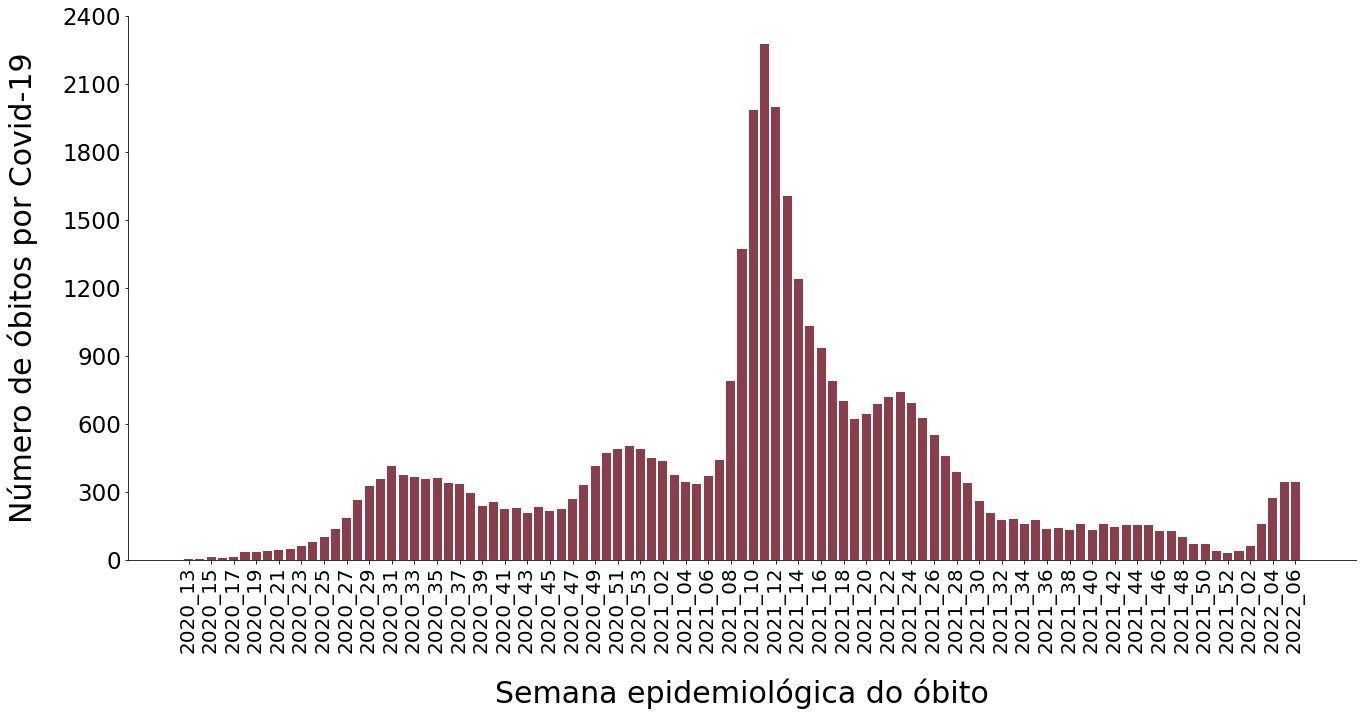

In [16]:
plt.figure(figsize=(22,10))
plt.bar(semana,obito,color='#8a3e4b')
sns.despine()
plt.xticks(np.arange(0,np.size(semana),2),rotation=90,fontsize=20)
plt.yticks(np.arange(0,2700,300),fontsize=23)
plt.xlabel('Semana epidemiológica do óbito',labelpad=25,fontsize=30)
plt.ylabel('Número de óbitos por Covid-19',labelpad=25,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide5.png',dpi=300,bbox_inches='tight')

In [11]:
zoomObito = filtrado
zoomObito = zoomObito.set_index('Sem Epi Evolucao')
zoomObito = zoomObito.drop('2022_07')
zoomObito = zoomObito['2021_51':]
zoomObito

,Classificacao final,Evolucao
Sem Epi Evolucao,,
2021_51,40,40
2021_52,31,31
2022_01,40,40
2022_02,62,62
2022_03,158,158
2022_04,271,271
2022_05,342,342
2022_06,345,345


In [12]:
zoomSemana = zoomObito
zoomSemana = zoomSemana.reset_index()
zoomSemana = zoomSemana['Sem Epi Evolucao']
zoomSemana

0    2021_51
1    2021_52
2    2022_01
3    2022_02
4    2022_03
5    2022_04
6    2022_05
7    2022_06
Name: Sem Epi Evolucao, dtype: object

In [13]:
zoomObito = zoomObito['Evolucao']
zoomObito

Sem Epi Evolucao
2021_51     40
2021_52     31
2022_01     40
2022_02     62
2022_03    158
2022_04    271
2022_05    342
2022_06    345
Name: Evolucao, dtype: int64

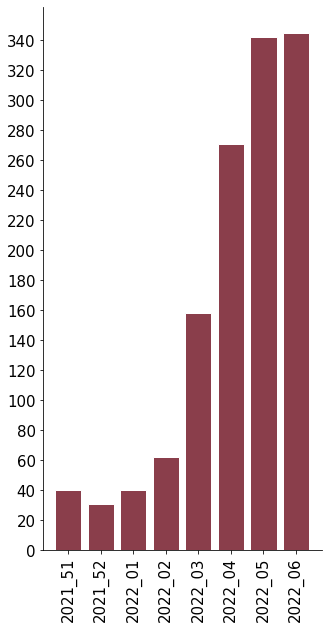

In [14]:
plt.figure(figsize=(5,10))
width=0.8
plt.bar(zoomSemana,zoomObito,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.xticks(fontsize=15,rotation=90)
plt.yticks(np.arange(0,360,20),fontsize=15)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide5_ZOOM.png',dpi=300,bbox_inches='tight')